In [30]:
##implmenting neural network to for regression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

#load data
df = pd.read_excel("C:\\Users\\ritwi\\OneDrive\\Desktop\\mpce-ml\\data\\ds-mospi.xlsx")
df

,Sector,State,NSS-Region,District,Household Type,Religion_HH_head,Social_Group_HH_head,HH Size (For FDQ),NCO-2015 Code(3-digit),NIC-2008 Code(5-digit),...,Is_HH_Have_Trucks,Is_HH_Have_Animal_cart,Is_HH_Have_Refrigerator,Is_HH_Have_Washing_machine,Is_HH_Have_Airconditioner_aircooler,Gender_HH_Head,Age_HH_Head,Marital_Status_HH_head,Total_year_of_education_completed_HH_head,TotalExpense
0,1,1,13,11,6,2,9,6,931.0,42909.0,...,0,0,1,1,0,1,48,2,2,24208.706458
1,1,1,13,11,2,2,9,4,833.0,49211.0,...,0,0,1,1,0,1,65,3,0,17065.553816
2,1,1,13,11,2,2,9,5,931.0,41001.0,...,0,0,1,1,0,1,48,2,9,22629.101761
3,1,1,13,11,6,2,9,4,931.0,41001.0,...,0,0,0,1,0,1,37,2,16,18530.465753
4,1,1,13,11,1,2,9,4,931.0,41001.0,...,0,0,1,1,0,1,46,2,8,18658.902153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52345,1,33,332,13,2,1,3,4,522.0,47219.0,...,0,0,1,0,0,1,60,2,0,17906.479452
52346,2,28,283,13,1,1,9,3,112.0,47820.0,...,0,0,1,1,1,1,69,2,10,24302.712329
52347,2,28,283,13,3,1,9,4,513.0,56101.0,...,0,0,1,1,1,1,40,2,7,42136.119374
52348,2,28,283,13,1,1,9,4,753.0,14105.0,...,0,0,1,1,0,2,38,3,0,23571.735812


array([[<Axes: title={'center': 'Sector'}>,
        <Axes: title={'center': 'State'}>,
        <Axes: title={'center': 'NSS-Region'}>,
        <Axes: title={'center': 'District'}>,
        <Axes: title={'center': 'Household Type'}>],
       [<Axes: title={'center': 'Religion_HH_head'}>,
        <Axes: title={'center': 'Social_Group_HH_head'}>,
        <Axes: title={'center': 'HH Size (For FDQ)'}>,
        <Axes: title={'center': 'NCO-2015 Code(3-digit)'}>,
        <Axes: title={'center': 'NIC-2008 Code(5-digit)'}>],
       [<Axes: title={'center': 'Is_HH_Have_Television'}>,
        <Axes: title={'center': 'Is_HH_Have_Radio'}>,
        <Axes: title={'center': 'Is_HH_Have_Laptop_PC'}>,
        <Axes: title={'center': 'Is_HH_Have_Mobile_handset'}>,
        <Axes: title={'center': 'Is_HH_Have_Bicycle'}>],
       [<Axes: title={'center': 'Is_HH_Have_Motorcycle_scooter'}>,
        <Axes: title={'center': 'Is_HH_Have_Motorcar_jeep_van'}>,
        <Axes: title={'center': 'Is_HH_Have_Trucks'}>,

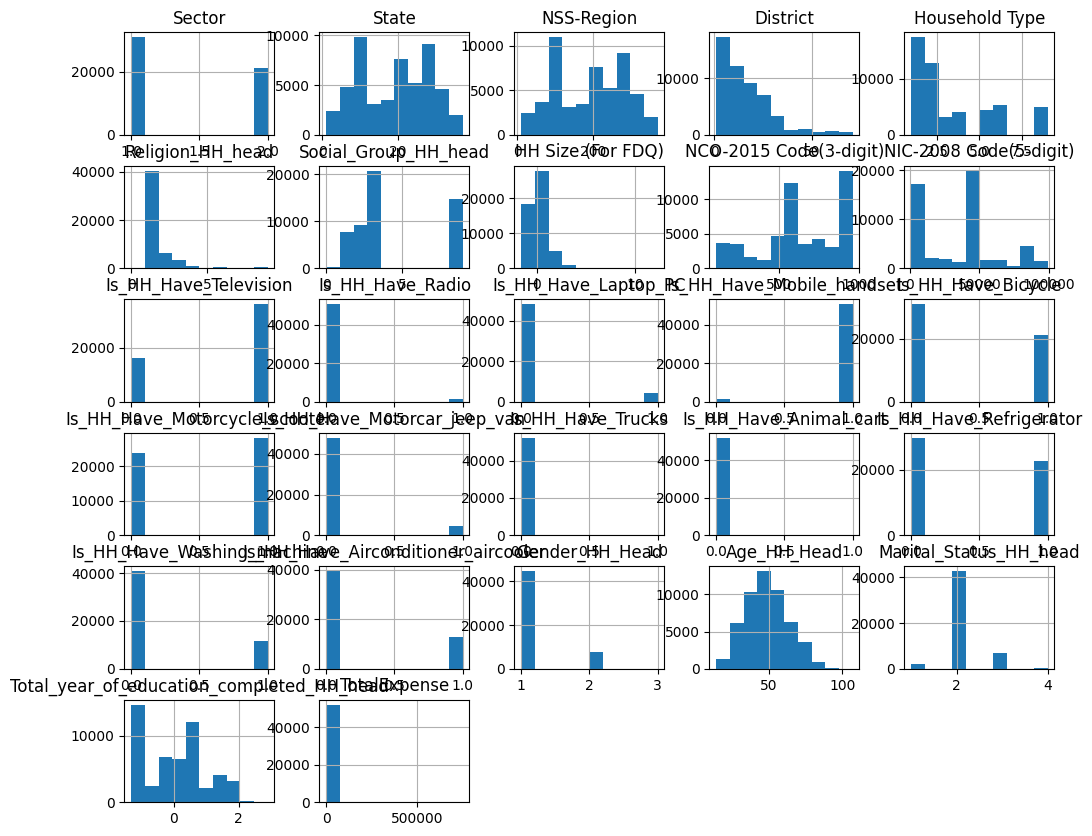

In [31]:
#processing data
import sklearn as skl
from sklearn.preprocessing import StandardScaler 

#counting null values
df.isnull().sum(axis = 0)

#mitigating null values with mode
df['NIC-2008 Code(5-digit)'].fillna(df['NIC-2008 Code(5-digit)'].mode()[0], inplace=True)
df['NCO-2015 Code(3-digit)'].fillna(df['NCO-2015 Code(3-digit)'].mode()[0], inplace=True)

#scaling numerical features to be gaussian
scaler = StandardScaler()
num_cols = ['Total_year_of_education_completed_HH_head', 'HH Size (For FDQ)']
df[num_cols] = scaler.fit_transform(df[num_cols])

df.hist(figsize=(12,10))


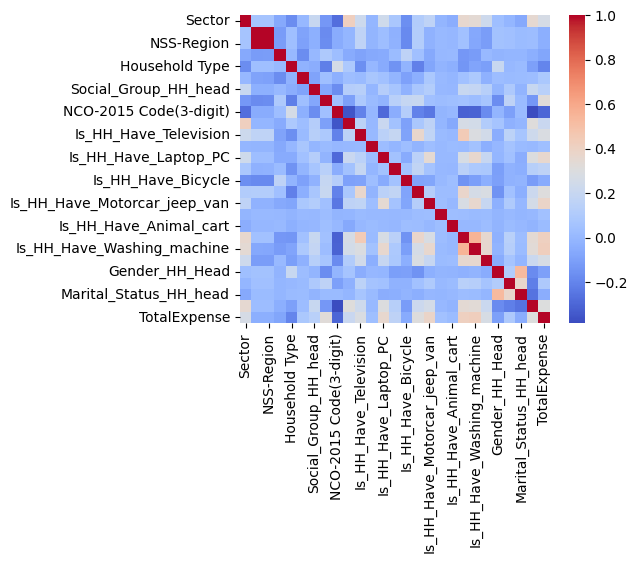

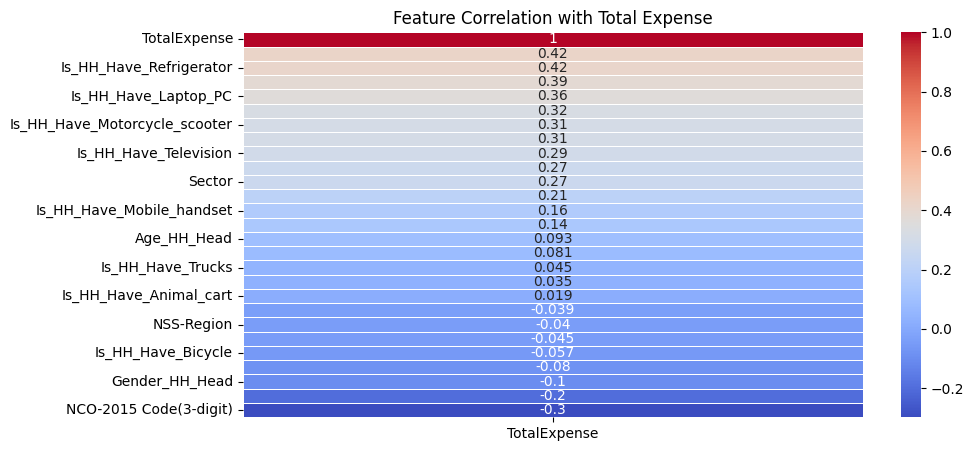

In [32]:
#relationships between columns and our target variable

#feature * feature matrix
correlation_matrix = df.corr()
plt.figure(figsize = (5,4))
sns.heatmap(correlation_matrix, cmap = "coolwarm")
plt.show()

#wrt target variable ["TotalExpense"]
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix[['TotalExpense']].sort_values(by='TotalExpense', ascending=False), 
            annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation with Total Expense")
plt.show()


In [34]:
import tensorflow as tf
from tensorflow import keras 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

#--splitting dataset into train-test-validation
X = df.drop(columns=['TotalExpense'])
y = df['TotalExpense']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

#--neural network ---
model = keras.Sequential([
    keras.layers.Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dense(1, activation = 'linear'),   ##output layer
])

model.compile (optimizer = 'adam', loss = 'mse', metrics = ['mae'])
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

predictions = model.predict(X_test[:5])
print("Sample Predictions:", predictions.flatten())


Training set: (36645, 26), (36645,)
Validation set: (26175, 26), (26175,)
Test set: (26175, 26), (26175,)


AttributeError: module 'keras.src.backend' has no attribute 'unique_object_name'